**Исследование для компании ChargeX**

# Описание проекта

https://colab.research.google.com/drive/1q_K-aeAsOsJ-FS8_v9GpeWOhbcgCTr-o?usp=sharing
онлайн тетрадь тут

Необходимо подготовить данные, проверить их на непротиворечивость и исключить аномалии, категоризировать заведения, в которых стоят точки для аренды пауер-банка, посмотреть, в каких из них терминалы для пауер-банков быстрее окупаются, построить и проверить гипотезы о целевой аудитории заказчика, предложить пути развития бизнеса.

# Импорт библиотек

In [4]:

!pip install google.colab
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.1)
import plotly.express as px
import ast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Чтение данных

In [60]:
# читаем наши файлы
path = '/content/drive/MyDrive/Chargex - 1/chargeX_3.zip (Unzipped Files)/'

rents = pd.read_csv(path+'rents.csv')
# stations = pd.read_csv(path+'stations.csv').drop(columns = {'_class'})
# файл со станциями читаем свой с городами полученными из DaData
url='https://drive.google.com/file/d/1hxIWw3-wmxuDadNBO0czH7v1BPecW6D_/view?usp=drivesdk'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

stations = pd.read_csv(url, sep = '\t')
users = pd.read_csv(path+'users.csv').drop(columns = {'_class'})
transactions = pd.read_csv(path+'transactions.csv')

<ipython-input-60-c973ab3ebda1>:12: DtypeWarning:

Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.



# Предобработка данных

## Файл rents

In [6]:
rents = rents.rename(columns = {'_id':'rent_id'})
rents.head(5)

,rent_id,completionStation,creditCardId,currentTariff.nameGroupTariffs,currentTariff.period,currentTariff.price,currentTariff.tariffName,currentTariff.timeForWork,currentTariff.typeTime,currentTariff.workingTimeInterval,...,totalAmount,transaction,updatedDate,user._id,user.blocking,user.createdDate,user.roles,user.telegramChatId,user.telegramLoginState,user.webUser
0,5ece363cab9b814d8716a6f0,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,NaN,1,0.0,Промо,1,HOUR,0,...,0.0,['5ece363cab9b814d8716a6f1'],2020-05-27T09:43:24.329Z,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",NaN,False,True
1,5ece45a5ab9b814d8716a703,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,NaN,2,50.0,Час 50 рублей,2,HOUR,1,...,50.0,"['5ece45a9ab9b814d8716a705', '5ece45a9ab9b814d...",2020-05-27T10:49:13.375Z,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",NaN,False,True
2,5ecfd910ab9b815292b21712,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,NaN,1,0.0,Промо,1,HOUR,0,...,0.0,['5ecfd910ab9b815292b21713'],2020-05-28T15:30:24.921Z,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",NaN,False,True
3,5ed7b00bab9b811856f6cab3,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,NaN,1,0.0,Промо,1,HOUR,0,...,0.0,['5ed7b00bab9b811856f6cab4'],2020-06-03T14:13:31.534Z,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",NaN,False,True
4,5ee7ab76ab9b81710d8ab8db,"Нальчик, ул.Льва Толстого 18",5ee7ab6cab9b81710d8ab8da,NaN,1,0.0,Промо,1,HOUR,0,...,0.0,['5ee7ab76ab9b81710d8ab8dc'],2020-06-15T17:10:14.076Z,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",NaN,False,True


In [7]:
rents.columns

Index(['rent_id', 'completionStation', 'creditCardId',
       'currentTariff.nameGroupTariffs', 'currentTariff.period',
       'currentTariff.price', 'currentTariff.tariffName',
       'currentTariff.timeForWork', 'currentTariff.typeTime',
       'currentTariff.workingTimeInterval', 'debt', 'finishedDate',
       'groupTariffs._id', 'groupTariffs.groupName', 'groupTariffs.location',
       'groupTariffs.periodCount', 'groupTariffs.tariffs',
       'notificationStatus', 'powerBankID', 'price', 'rentStatus', 'startDate',
       'startStation', 'stationID', 'stationNumber',
       'tariffText.locationForTariff', 'tariffText.tariffText', 'totalAmount',
       'transaction', 'updatedDate', 'user._id', 'user.blocking',
       'user.createdDate', 'user.roles', 'user.telegramChatId',
       'user.telegramLoginState', 'user.webUser'],
      dtype='object')

## Файл stations

## Получение полных данных по адресу

In [8]:
# pip install dadata

In [9]:
# from dadata import Dadata

In [10]:
#token = "**************************"
#secret = '**************************'
#dadata = Dadata(token, secret)
#result = dadata.clean("address", 'г Москва, ул 2-я Рейсовая, д 2 к 5	') # тестовый запрос
#result

In [11]:
#stations['station_adress_info'] = stations.apply(lambda row: dadata.clean("address", row['address']), axis = 1)

In [12]:
# stations['city'] = stations.apply(lambda row: row['station_adress_info'].get('city'), axis = 1)
# stations['city']

In [13]:
# stations['city'].value_counts(sort = False, normalize = True)

In [14]:
# stations.to_csv('stations_w_city.csv')

In [15]:
stations.rename(columns = {'_id':'station_id'}, inplace = True)

In [16]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0,"0 to 904,"904
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ,station_id               905 non-null    object 
 1   additionalAddress         905 non-null    object 
 2   additionalImagesCount     905 non-null    int64  
 3   address                   905 non-null    object 
 4   blockedSlots              875 non-null    object 
 5   comment                   69 non-null     object 
 6   connectedAddress          903 non-null    object 
 7   connectionMode            842 non-null    object 
 8   created                   905 non-null    object 
 9   csq                       905 non-null    int64  
 10  firmwareVersion           901 non-null    object 
 11  groupTariffs._id          905 non-null    object 
 12  groupTariffs.groupName    905 non-null    object 
 13  groupTariffs.location     905 non-null    object 
 14  groupTa

## Файл users

In [17]:
users = users.rename(columns = {'_id':'user_id'})
users

,user_id,blocking,createdDate,roles,telegramChatId,telegramLoginState,webUser
0,5ec3a385ab9b811e07d3e33c,False,2020-05-19T09:14:45.939Z,"[{""role"":""USER""}]",False,False,True
1,5ec3bd6eab9b811e07d3e341,False,2020-05-19T11:05:18.231Z,"[{""role"":""USER""}]",True,True,True
2,5ec51a6fab9b8123161f6272,False,2020-05-20T11:54:23.909Z,"[{""role"":""USER""}]",True,True,True
3,5ec617b9ab9b8123161f6281,False,2020-05-21T05:55:05.677Z,"[{""role"":""USER""}]",True,False,True
4,5ecd1f58ab9b8123161f62a5,False,NaN,"[{""role"":""ADMIN""}]",False,False,False
...,...,...,...,...,...,...,...
140549,63736ca165c92736f6b04846,False,2022-11-15T10:40:33.250Z,"[{""role"":""USER""}]",False,False,True
140550,63736d2b65c92736f6b0489f,False,2022-11-15T10:42:51.779Z,"[{""role"":""USER""}]",False,False,True
140551,63736fc065c92736f6b04a26,False,2022-11-15T10:53:52.774Z,"[{""role"":""USER""}]",False,False,True
140552,6373730165c92736f6b04bf6,False,2022-11-15T11:07:45.908Z,"[{""role"":""USER""}]",False,False,True


## Файл transactions


In [62]:
transactions = transactions.rename(columns={'_id':'transaction_id','user._id':'user_id','rentId':'rent_id'})
transactions = transactions.drop(columns = {'user.blocking','user.createdDate','user.roles','user.telegramLoginState','user.webUser'})
transactions.head()

,transaction_id,createdDate,description,price,rent_id,transactionStatus,user_id
0,5ece363cab9b814d8716a6f1,2020-05-27T09:43:24.327Z,tariff period: 1,0.0,5ece363cab9b814d8716a6f0,CREDIT,5ece331eab9b814d8716a6ea
1,5ece45a9ab9b814d8716a704,2020-05-27T10:49:13.373Z,tariff period: 2,50.0,5ece45a5ab9b814d8716a703,CREDIT,5ece331eab9b814d8716a6ea
2,5ece45a9ab9b814d8716a705,2020-05-27T10:49:13.374Z,tariff period: 2 credit card: 1377,50.0,5ece45a5ab9b814d8716a703,DEBIT,5ece331eab9b814d8716a6ea
3,5ecfd910ab9b815292b21713,2020-05-28T15:30:24.921Z,tariff period: 1,0.0,5ecfd910ab9b815292b21712,CREDIT,5ece331eab9b814d8716a6ea
4,5ed7b00bab9b811856f6cab4,2020-06-03T14:13:31.525Z,tariff period: 1,0.0,5ed7b00bab9b811856f6cab3,CREDIT,5ece331eab9b814d8716a6ea


# EDA

## Анализ окупаемости станций

In [18]:
pd.set_option('display.max_columns', None)

In [19]:
# посмотрим соотношения стран в данных
rents['groupTariffs.location'].value_counts()

RU     216801
BY       2780
ARM         2
Name: groupTariffs.location, dtype: int64

In [20]:
# для упрощения пока оставим только данные по РФ
rents = rents[rents['groupTariffs.location'] == 'RU']

In [21]:
# посчитаем выручку по каждой станции
revenue = rents.groupby('stationID').agg({'totalAmount':'sum'}).reset_index().sort_values(by = 'totalAmount', ascending = False)
revenue

,stationID,totalAmount
899,RL3H242001840013,705400.0
522,FFRH082006020013,696950.0
9,ADDH242108870007,679650.0
537,FFRH082006430027,548050.0
665,FFRH082008880015,490100.0
...,...,...
111,FFRH042012060045,0.0
788,FFRH082111200241,0.0
114,FFRH042012070024,0.0
29,DONB031901430004,0.0


In [22]:
# посмотрим на распределение прибылей
fig = px.histogram(revenue,
                 x='totalAmount',
                 nbins=20,
                 width=800, height=400,
                 title="Распределение выручки станций",
                 labels = {'count':'количество', 'totalAmount':'выручка, руб.'})
fig.show()

Наблюдаем "толстый хвост" распределения.

In [23]:
# отфильтруем по 95-му квантилю

fig = px.histogram(revenue[revenue['totalAmount'] < revenue['totalAmount'].quantile(0.95)],
                 x='totalAmount',
                 nbins=20,
                 width=800, height=400,
                 title="Распределение выручки станций",
                 labels = {'count':'количество', 'totalAmount':'выручка, руб.'})
fig.show()

In [24]:
# посчитаем сколько станций вообще не приносит денег
print('Не приносят денег', revenue[revenue['totalAmount'] == 0]['stationID'].count(), 'станций')

Не приносят денег 9 станций


Посмотрим, какие станции не приносят прибыль

In [25]:
# присоединим к выручке информацию о станциях
revenue = pd.merge(revenue, stations, on = 'stationID', how = 'left')

In [26]:
revenue[revenue['totalAmount'] == 0][['stationID','additionalAddress','address','status']].dropna()

,stationID,additionalAddress,address,status
892,FFRH082111250132,"Аян, кафе","Россия, Забайкальский край, Чита, Ленинградска...",DISCONNECTED
893,DONB091901850004,офис альянс,"Ростовская обл, г Аксай, ул Пороховая Балка, д...",DISCONNECTED
894,FFRH082107650003,Кофейня Кофе Вейк,"Россия, Республика Коми, Сыктывкар, Коммунисти...",CONNECTED
896,FFRH082111200241,"8611 """"""""Сибирь"""""""" гостиница""""","Краснодарский край, г Сочи, село Эстосадок, на...",DISCONNECTED
898,DONB031901430004,Чита,"Ростовская обл, г Аксай, ул Пороховая Балка, д...",DISCONNECTED
899,DONB031901040094,Чита,"Чита, ул Ленина, д 93",DISCONNECTED


С этими станциями проблемы, они отключены и ни разу не использовались. Станция в Сыктывкаре работает, но не приносит прибыль

In [27]:
revenue = revenue.rename(columns = {'totalAmount':'station_revenue'})

Чтобы узнать окупилась ли станция нам надо знать, сколько стоила ее установка.
Возьмём данные с сайта компании Chargex:


*   4 пауэрбанков - 18000р.
*   8 пауэрбанков - 36000р.
*   24 пауэрбанков - 180000р.
*   48 пауэрбанков - 360000р.



In [28]:
# посмотрим какие станции есть в наших данных
stations['numberSlots'].value_counts(normalize = True)

8     0.482873
4     0.433149
3     0.033149
9     0.027624
24    0.022099
6     0.001105
Name: numberSlots, dtype: float64

В основом компания продаёт станции на 8 и 4 банки.

In [29]:
stations = stations.dropna(subset = ['numberSlots'])
stations['numberSlots'].unique()

array([ 8,  3,  9,  4, 24,  6])

In [30]:
# создадим словарь с ценами на станции, неизвестные станции заполним ближайшими
station_price = ({4:18000,
                  8:36000,
                  24:180000,
                  48:360000, 
                  3:18000, 
                  9:36000, 
                  6:36000})

In [31]:
revenue = revenue.dropna(subset = ['numberSlots'])
revenue['numberSlots'].unique()

array([24.,  8.,  4.,  9.,  3.,  6.])

Для каждой станции сравним всю полученную выручку и сравним со стоимостью станции

In [32]:
# узнаем для каждой станции, окупилась ли она
revenue['is_paybacked'] = revenue.apply(lambda row: row['station_revenue'] >= station_price.get(row['numberSlots']), axis = 1)
revenue.head(5)

<ipython-input-32-1a57876b21b0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,stationID,station_revenue,",station_id",additionalAddress,additionalImagesCount,address,blockedSlots,comment,connectedAddress,connectionMode,created,csq,firmwareVersion,groupTariffs._id,groupTariffs.groupName,groupTariffs.location,groupTariffs.periodCount,groupTariffs.tariffType,groupTariffs.tariffs,latitude,locked,longitude,numberSlots,owner,simCardId,stationNumber,status,statusAt,timezone,voiceLevel,workTime.friday,workTime.monday,workTime.saturday,workTime.sunday,workTime.thursday,workTime.tuesday,workTime.wednesday,station_adress_info,city,is_paybacked
0,RL3H242001840013,705400.0,61ce174fa3b0cc14c176a607,"Внуково Аэропорт, второй этаж",12.0,"Москва, ул 2-я Рейсовая улица, 2к5",[],Напротив выхода 12А,10.129.0.34,LTE,2022-06-04T12:30:45.079Z,31.0,RL1.H4.24.26,61701439a08c216681282e88,Рублёвый. 150₽/час; 300₽/сутки,RU,2.0,STANDARD,"[{""""""""_id"""""""":{""""""""$oid"""""""":""""""""61701471a08c21...",55.603309,False,37.283671,24.0,NaN,897010269298005644F,5015.0,CONNECTED,2022-11-15T11:53:23.122Z,GMT+04:00,0.0,NaN,"[""""""""ANYTIME""""""""]""""",NaN,NaN,NaN,NaN,NaN,"{'source': 'Москва, ул 2-я Рейсовая улица, 2к5...",NaN,True
1,FFRH082006020013,696950.0,5f364e5b24aa9a0006a5fc1f,"2301 """"""""Barceloneta"""""""" ресторан.""""",0.0,"Сочи, ул. Несебрская, д. 6",[],NaN,10.129.0.34,LTE,2022-05-24T12:01:13.532Z,27.0,RL1.H6.08.37,6038dea33d18b03b58d8a749,Рублевый. 100₽/сутки,RU,1.0,STANDARD,"[{""""""""_id"""""""":{""""""""$oid"""""""":""""""""6038def53d18b0...",43.582031,False,39.719226,8.0,NaN,8970199200918930440,2301.0,CONNECTED,2022-11-15T11:53:24.456Z,GMT+04:00,0.0,"[""""""""08:00"""""""",""""""""00:00""""""""]""""","[""""""""08:00"""""""",""""""""00:00""""""""]""""","[""""""""08:00"""""""",""""""""00:00""""""""]""""","[""""""""08:00"""""""",""""""""00:00""""""""]""""","[""""""""08:00"""""""",""""""""00:00""""""""]""""","[""""""""08:00"""""""",""""""""00:00""""""""]""""","[""""""""08:00"""""""",""""""""00:00""""""""]""""","{'source': 'Сочи, ул. Несебрская, д. 6', 'resu...","Сочи""",True
2,ADDH242108870007,679650.0,61cda2c3a3b0cc14c17697d7,Терминал А,3.0,"г Москва, ул 2-я Рейсовая, д 2 к 5",[],Левее Шоколадницы. Напротив выхода 11,10.128.0.29,LTE,2022-06-04T12:33:46.406Z,31.0,RL1.S4.24.00,61701439a08c216681282e88,Рублёвый. 150₽/час; 300₽/сутки,RU,2.0,STANDARD,"[{""""""""_id"""""""":{""""""""$oid"""""""":""""""""61701471a08c21...",55.603992,False,37.284321,24.0,NaN,897010269850255223F,7748.0,CONNECTED,2022-11-15T11:53:32.792Z,GMT+04:00,0.0,NaN,"[""""""""ANYTIME""""""""]""""",NaN,NaN,NaN,NaN,NaN,"{'source': 'г Москва, ул 2-я Рейсовая, д 2 к 5...",NaN,True
3,FFRH082006430027,548050.0,5f2ee14924aa9a0006ac6f3b,Кафе Loft Park,0.0,"Кабардино-Балкарская Республика, Нальчик, микр...",[],NaN,10.129.0.34,LTE,2021-05-12T15:51:48.097Z,26.0,RL1.H6.08.37,6038dea33d18b03b58d8a749,Рублевый. 100₽/сутки,RU,1.0,STANDARD,"[{""""""""_id"""""""":{""""""""$oid"""""""":""""""""6038def53d18b0...",43.465502,False,43.593166,8.0,NaN,897010269661194421F,707.0,DISCONNECTED,2022-04-24T07:38:42.823Z,GMT+04:00,0.0,NaN,"[""""""""ANYTIME""""""""]""""",NaN,NaN,NaN,NaN,NaN,"{'source': 'Кабардино-Балкарская Республика, Н...","Нальчик""",True
4,FFRH082008880015,490100.0,5f21251fab9b810c75f38ad6,"Лофт Кафе, эт. 1",0.0,"Кабардино-Балкарская Республика, Нальчик, улиц...",[],NaN,10.129.0.34,LTE,2021-05-13T18:48:05.419Z,29.0,RL1.H6.08.40,6038dea33d18b03b58d8a749,Рублевый. 100₽/сутки,RU,1.0,STANDARD,"[{""""""""_id"""""""":{""""""""$oid"""""""":""""""""6038def53d18b0...",43.496201,False,43.597954,8.0,NaN,897010269298005636F,720.0,DISCONNECTED,2022-04-24T13:09:25.989Z,GMT+04:00,0.0,NaN,"[""""""""ANYTIME""""""""]""""",NaN,NaN,NaN,NaN,NaN,"{'source': 'Кабардино-Балкарская Республика, Н...","Нальчик""",True


In [33]:
revenue['is_paybacked'].value_counts(normalize = True)

False    0.644706
True     0.355294
Name: is_paybacked, dtype: float64

У нас не окупаются 65% станций

In [34]:
# Посмотрим какие станции окупаются
revenue[revenue['is_paybacked'] == True][['stationID','additionalAddress','address','numberSlots','city','station_revenue']].sort_values(by = 'station_revenue', ascending = False).head(8)

,stationID,additionalAddress,address,numberSlots,city,station_revenue
0,RL3H242001840013,"Внуково Аэропорт, второй этаж","Москва, ул 2-я Рейсовая улица, 2к5",24.0,NaN,705400.0
1,FFRH082006020013,"2301 """"""""Barceloneta"""""""" ресторан.""""","Сочи, ул. Несебрская, д. 6",8.0,"Сочи""",696950.0
2,ADDH242108870007,Терминал А,"г Москва, ул 2-я Рейсовая, д 2 к 5",24.0,NaN,679650.0
3,FFRH082006430027,Кафе Loft Park,"Кабардино-Балкарская Республика, Нальчик, микр...",8.0,"Нальчик""",548050.0
4,FFRH082008880015,"Лофт Кафе, эт. 1","Кабардино-Балкарская Республика, Нальчик, улиц...",8.0,"Нальчик""",490100.0
5,FFRH082006000046,Vincenzo парк Хетагурова,"г Владикавказ, ул Максима Горького, д 1",8.0,"Владикавказ""",398900.0
6,FFRH082006820039,Водная,"Владикавказ, пр-кт Коста, д 26",8.0,"Владикавказ""",397000.0
7,ADDH242108650005,"Внуково Аэропорт, 2 этаж","Москва, ул 2-я Рейсовая улица, 2к5",24.0,NaN,390800.0


<Axes: xlabel='numberSlots'>

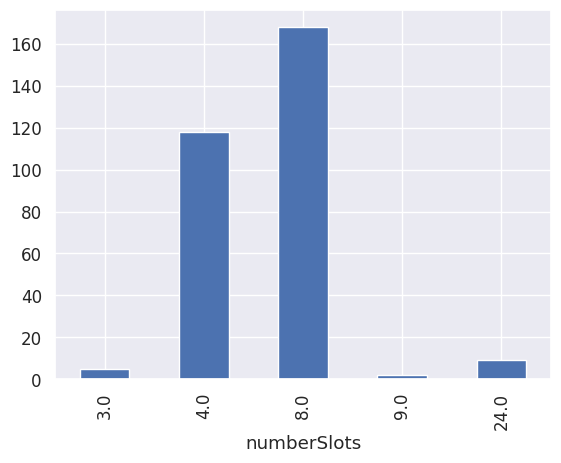

In [35]:
# посмотрим какие есть станции среди окупаемых
revenue[revenue['is_paybacked'] == True].groupby('numberSlots')['stationID'].count().plot(kind="bar")

Преобладают станции с 4 и 8 слотами


<Axes: xlabel='numberSlots'>

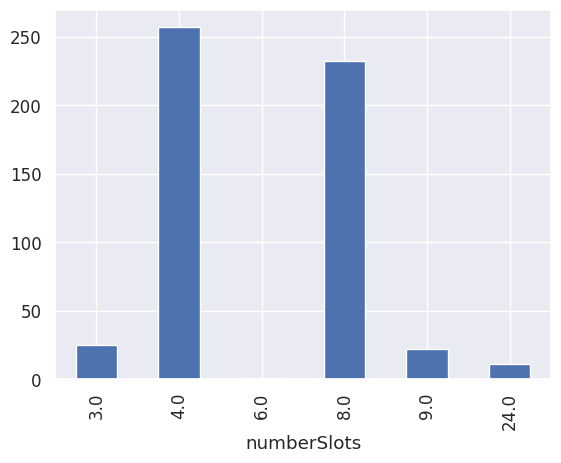

In [36]:
# посмотрим какие есть станции среди не окупаемых
revenue[revenue['is_paybacked'] == False].groupby('numberSlots')['stationID'].count().plot(kind="bar")

Тут тоже станции на 4 и 8 слотов

## Расчёт среднедневной выручки по станциям

In [37]:
# для каждой станции найдём дату первой и последней аренды
station_lifetime = rents.groupby('stationID').agg({'startDate':['min', 'max']}).reset_index()
station_lifetime.columns = ['stationID', 'first_rent', 'last_rent']
station_lifetime[['first_rent','last_rent']] = station_lifetime[['first_rent','last_rent']].apply(pd.to_datetime)
station_lifetime['life_time'] = (station_lifetime['last_rent'] - station_lifetime['first_rent']).dt.days
station_lifetime.sort_values(by = 'life_time', ascending = False)

,stationID,first_rent,last_rent,life_time
883,RL3H081907800167,2020-06-18 14:39:11.370000+00:00,2022-11-14 16:13:39.606000+00:00,879
877,RL3H081904630004,2020-06-30 15:17:01.940000+00:00,2022-11-09 06:59:23.066000+00:00,861
879,RL3H081907430166,2020-07-03 12:51:05.538000+00:00,2022-11-09 17:22:02.951000+00:00,859
549,FFRH082006640006,2020-07-22 12:00:39.178000+00:00,2022-11-15 12:28:37.477000+00:00,846
546,FFRH082006610018,2020-07-25 14:50:05.180000+00:00,2022-11-14 18:21:40.833000+00:00,842
...,...,...,...,...
41,DONB031901800050,2020-10-27 13:46:18.504000+00:00,2020-10-27 15:13:05+00:00,0
414,FFRH042108800191,2021-12-04 08:54:05.075000+00:00,2021-12-04 08:54:05.075000+00:00,0
792,FFRH082111250132,2022-03-12 08:52:23.848000+00:00,2022-03-12 08:52:23.848000+00:00,0
427,FFRH042108810200,2022-02-07 08:10:43.080000+00:00,2022-02-07 08:10:43.080000+00:00,0


In [38]:
px.histogram(data_frame=station_lifetime, x = 'life_time', nbins = 50,
                 width=800, height=600,
                 title="Распределение лайфтаймов",
                 labels = {'count':'количество', 'life_time':'лайфтайм, дней'})


У нас больше всего станций которые живут 6-15 месяцев.

In [39]:
# посчитаем сколько станций не прожили и месяца
station_lifetime[station_lifetime['life_time'] <= 31]['stationID'].count()

28

28 станций не прожили и месяца

In [40]:
# присоединим таблицу с лайфтаймами
revenue = pd.merge(revenue , station_lifetime, on = 'stationID', how = 'left')
# заменим нулевые лайфтаймы на 1
revenue['life_time'].replace(to_replace=0, value = 1, inplace = True)

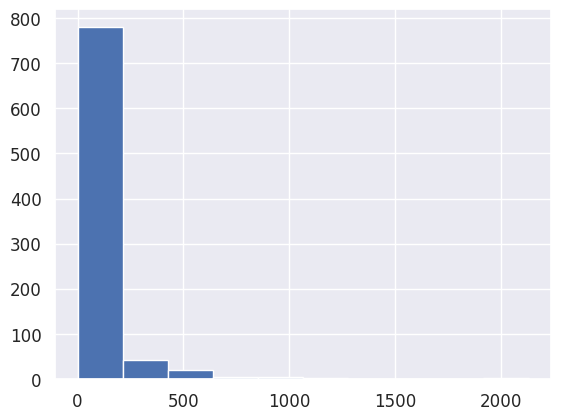

In [41]:
# посчитаем среднюю прибыль в день
revenue['station_revenue_per_day'] = revenue['station_revenue'] / revenue['life_time']
revenue['station_revenue_per_day'].hist()
plt.show()

Получилось распределение с "толстым хвостом"

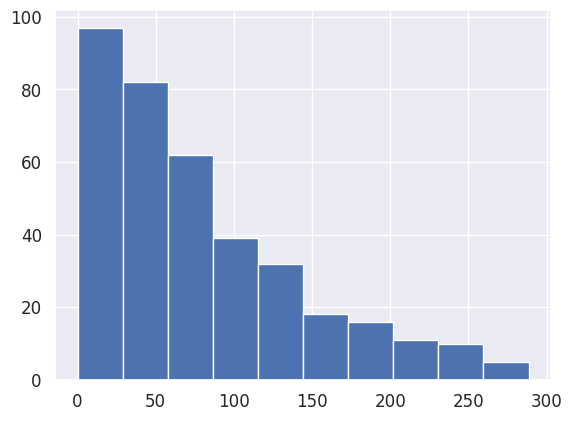

In [42]:
# отфильтруем по 95-му квантилю
# посмотрим прибыль в месяц станций с 8 банками
revenue[(revenue['station_revenue_per_day'] < revenue['station_revenue_per_day'].quantile(0.95)) & (revenue['numberSlots'] == 8)]['station_revenue_per_day'].hist()
plt.show()

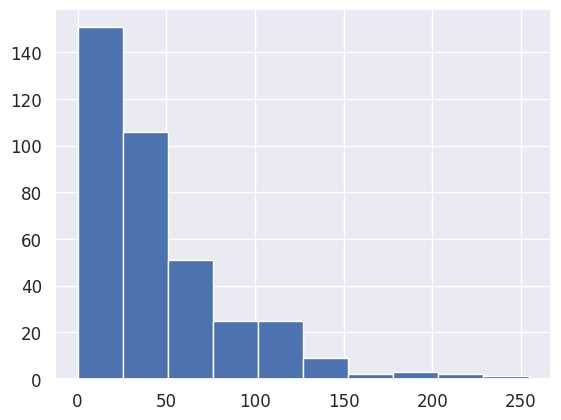

In [43]:
# отфильтруем по 95-му квантилю
# посмотрим прибыль в месяц станций с 4 банками
revenue[(revenue['station_revenue_per_day'] < revenue['station_revenue_per_day'].quantile(0.95)) & (revenue['numberSlots'] == 4)]['station_revenue_per_day'].hist()
plt.show()

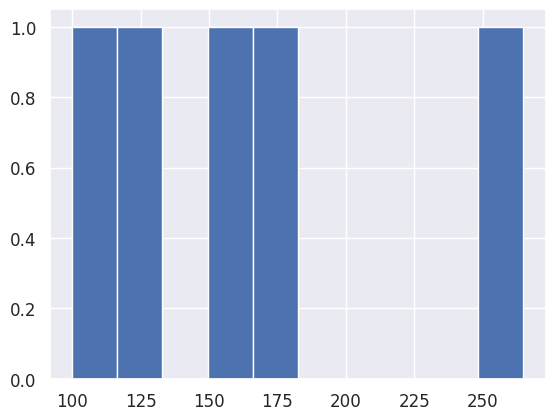

In [44]:
# отфильтруем по 95-му квантилю
# посмотрим прибыль в месяц станций с 24 банками
revenue[(revenue['station_revenue_per_day'] < revenue['station_revenue_per_day'].quantile(0.95)) & (revenue['numberSlots'] == 24)]['station_revenue_per_day'].hist()
plt.show()

In [45]:
# посмотрим какие станции не окупились, отсортируем их по средней выручке в день
# выводим первые 20
revenue[revenue['is_paybacked'] == False].sort_values(by = 'station_revenue_per_day', ascending = False)[['stationID','station_revenue','additionalAddress','address','numberSlots','life_time',	'station_revenue_per_day']].head(20)

,stationID,station_revenue,additionalAddress,address,numberSlots,life_time,station_revenue_per_day
32,ADDH242108250003,178750.0,"Внуково Аэропорт, 1й этаж","г Москва, ул 2-я Рейсовая улица, 2к5",24.0,319,560.344828
34,ADDH242108200008,174650.0,"Аэропорт Внуково, 2 этаж","г Москва, ул 2-я Рейсовая, д 2 к 5 стр 1",24.0,319,547.492163
38,ADDH242108890009,162800.0,Аэропорт Внуково. 2й этаж,"г Москва, ул 2-я Рейсовая улица, 2к5",24.0,314,518.471338
75,FFRH242111490002,101700.0,у фонтана Murmansk Mall Торгово-развлекатель...,"Россия, Мурманск, проспект Ленина, 32",24.0,201,505.970149
40,ADDH242108200006,157950.0,"Внуково Аэропорт, 2й этаж","г Москва, ул 2-я Рейсовая улица, 2к5",24.0,313,504.632588
60,FFRH242109020002,117800.0,"2372 """"""""Гастропорт - Адлер""""""""""""","Краснодарский край, г Сочи, ул Демократическая...",24.0,321,366.978193
482,FFRH082111010019,13200.0,"2362 """"""""Снега"""""""" отель """"","Россия, Краснодарский край, городской округ Со...",8.0,44,300.000000
464,FFRH242111080001,14300.0,Стерильная зона 2й этаж,"Волгоград, шоссе Авиаторов, 161Б",24.0,54,264.814815
298,FFRH082111850017,27500.0,"2305 """"""""La Terrazza Marina"""""""" Ресторан""""","Краснодарский край, г Сочи Войкова 1/1",8.0,127,216.535433
824,FFRH042108480159,200.0,Прошуттерия,"220114, Беларусь, г Минск, ул Петра Мстиславца...",4.0,1,200.000000


Несмотря на высокую среднемесячную прибыль, станции на 24 банки (например в аэропорту) пока не окупились.

In [46]:
# посмотрим какие станции окупились быстрее всех
# выведем первые 20
(revenue[revenue['is_paybacked'] == True]
 .sort_values(by = ['life_time', 'station_revenue_per_day'])
 [['stationID','station_revenue','city','additionalAddress','address','numberSlots','life_time',	'station_revenue_per_day']].head(20))

,stationID,station_revenue,city,additionalAddress,address,numberSlots,life_time,station_revenue_per_day
224,FFRH082107250061,37300.0,"Сочи""","2355 """"""""Del Mar"""""""" пляж 1""""","Краснодарский край, г Сочи, Морской пер, д 1/1А",8.0,127,293.700787
106,FFRH082107420086,76050.0,"Сириус""","2330 """"""""Роллер"""""""" Ресторан""""","Краснодарский край, пгт Сириус, Олимпийский пр...",8.0,135,563.333333
400,FFRH042108490161,18500.0,"Набережные Челны""",Bambook | Бар,"Россия, Республика Татарстан, Набережные Челны...",4.0,136,136.029412
382,FFRH042108490152,19250.0,"Пятигорск""",СПА Отель Хаят Ресепшн,"Россия, Ставропольский край, Пятигорск, Бештау...",4.0,148,130.067568
80,FFRH082107060091,97400.0,"Сочи""","2353 """"""""На Штиле"""""""" ресторан""""","Россия, Краснодарский край, Сочи, микрорайон Ц...",8.0,166,586.746988
108,FFRH082111250291,75000.0,"Нальчик""",Лофт Кафе 1 эт.,"Россия, Кабардино-Балкарская Республика, Нальч...",8.0,208,360.576923
98,FFRH082111620155,80400.0,"Нальчик""",Кафе Loft Park,"Россия, Кабардино-Балкарская Республика, Нальч...",8.0,208,386.538462
23,ADDH242108030001,208350.0,"Жуковский""",Аэропорт Жуковский,"Россия, Московская область, городской округ Жу...",24.0,215,969.069767
202,FFRH082111850053,41900.0,"Владикавказ""",Столица 1 этаж,"г Владикавказ, ул Астана Кесаева, зд 2А",8.0,251,166.932271
180,FFRH082111200135,47300.0,"Владикавказ""",гостин. Владикавказ,"г Владикавказ, ул Коцоева, д 75",8.0,251,188.446215


*Быстрее* всех окупаются станции на 4 и 8 банок, установленные в крупных ТЦ, кинотеатрах, ресторанах в курортных зонах.

In [47]:
# обрежем кавычки в названии городов
revenue['city'] = revenue['city'].str[:-1].astype(str)
revenue['city']

0            nan
1           Сочи
2            nan
3        Нальчик
4        Нальчик
         ...    
845    Сыктывкар
846         Сочи
847          nan
848        Аксай
849         Чита
Name: city, Length: 850, dtype: object

## Правка пропусков в поле city

In [48]:
revenue['city'] = revenue['city'].astype(str)

In [49]:
# создадим функцию, чтобы исправить незаполненные данные о городах (заменить на данные из region)
def city_corrector(row):
  if row['city'] == 'nan':                    
    s = row['station_adress_info']
    s = s[:-1]        
    station_dict = ast.literal_eval(s)
    row['city'] = station_dict.get('region')


In [50]:
s = revenue['station_adress_info'][0]
s = s[:-1]
station_dict = ast.literal_eval(s)
city = station_dict.get('region')
revenue['city'][0] = city
revenue['city'][0]

<ipython-input-50-b15d9aaacf00>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'Москва'

In [51]:
array = revenue[revenue['city'] == 'nan'].index
array

Int64Index([  2,   7,  12,  16,  21,  32,  34,  37,  38,  40,  67,  82,  84,
             86,  97, 100, 103, 111, 114, 121, 123, 126, 150, 151, 172, 207,
            209, 212, 223, 281, 314, 322, 332, 339, 342, 353, 390, 401, 407,
            409, 415, 423, 430, 431, 457, 462, 502, 510, 518, 522, 530, 532,
            567, 571, 584, 593, 601, 604, 612, 622, 665, 703, 735, 758, 765,
            775, 782, 795, 804, 811, 825, 838, 842, 847],
           dtype='int64')

In [52]:
# это мои костыли, я почему то не смог через apply сделать 😥
for i in array:
  s = revenue['station_adress_info'][i]
  s = s[:-1]
  station_dict = ast.literal_eval(s)
  city = station_dict.get('region')
  revenue['city'][i] = city

<ipython-input-52-0371f43a532f>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
revenue['city'].unique()

array(['Москва', 'Сочи', 'Нальчик', 'Владикавказ', 'Пятигорск',
       'Кисловодск', 'Жуковский', 'Сириус', 'Ставрополь', 'Московская',
       'Екатеринбург', 'Самара', 'Пенза', 'Ялта', 'Мурманск', 'Якутск',
       'Тольятти', 'Иркутск', 'Томск', 'Северная Осетия - Алания',
       'Воронеж', 'Мончегорск', 'Чебоксары', 'Новосибирск',
       'Железноводск', 'Ростов-на-Дону', 'Щёлково', 'Нефтеюганск',
       'Астрахань', 'Кабардино-Балкарская', 'Волгоград', 'Оренбург',
       'Белгород', 'Орёл', 'Североморск', 'Санкт-Петербург',
       'Невинномысск', 'Иркутская', 'Ульяновск', 'Волжский',
       'Набережные Челны', 'Симферополь', 'Саранск', 'Нижний Новгород',
       'Михайловск', 'Ахтубинск', 'Алушта', 'Шахты', 'Колпино',
       'Альметьевск', 'Королёв', 'Сестрорецк', 'Белореченск',
       'Белокуриха', 'Красноярск', 'Севастополь', 'Отрадный',
       'Красногорск', 'Балашиха', 'Аксай', 'Грозный', 'Мытищи',
       'Мурманская', 'Краснодар', 'Саха /Якутия/', 'Нижнекамск', 'Химки',
       'Т

## Анализ станций по городам

In [54]:
# посчитаем количество станций по городам
revenue.groupby('city').agg({'stationID':'count'}).reset_index().sort_values(by = 'stationID', ascending = False).head(10)

,city,stationID
70,Сочи,67
60,Самара,54
50,Нижний Новгород,48
14,Владикавказ,42
71,Ставрополь,42
74,Тольятти,41
40,Москва,40
42,Мурманск,34
59,Ростов-на-Дону,34
45,Набережные Челны,29


Больше всего станций установлено в  Сочи, Самаре, Нижним Новгороде.

In [55]:
revenue.groupby('city').agg({'stationID':'count'}).reset_index()['stationID'].sum()

850

In [56]:
# посчитаем самые прибыльные города
revenue.groupby('city').agg({'station_revenue':'sum'}).reset_index().sort_values(by = 'station_revenue', ascending = False).head(10)

,city,station_revenue
70,Сочи,6398674.0
40,Москва,4505852.0
14,Владикавказ,4490050.0
46,Нальчик,2163200.0
29,Кисловодск,1423100.0
71,Ставрополь,1188450.0
60,Самара,1134324.0
42,Мурманск,1108550.0
74,Тольятти,850104.0
58,Пятигорск,825850.0


Самые прибыльные города это :
- Сочи
- Москва
- Владикавказ
- Нальчик
- Кисловодск
- Ставрополь
- Самара
- Мурманск
- Тольятти
- Пятигорск


In [57]:
# посчитаем самые прибыльные в день города
revenue.groupby('city').agg({'station_revenue_per_day':'sum'}).reset_index().sort_values(by = 'station_revenue_per_day', ascending = False).head(10)

,city,station_revenue_per_day
70,Сочи,12894.972547
40,Москва,10256.682277
14,Владикавказ,7529.153953
46,Нальчик,4219.501836
42,Мурманск,3166.070606
60,Самара,3138.017061
71,Ставрополь,2812.189512
29,Кисловодск,2323.939487
74,Тольятти,2125.867356
21,Екатеринбург,1706.699856


1.   Сочи
2.   Москва
3.   Владикавказ
4.   Нальчик
5.   Мурманск
6.   Самара
7.   Ставрополь
8.   Кисловодск
9.   Тольятти
10.  Екатеринбург



## Анализ трат пользователей

(0.0, 5000.0)

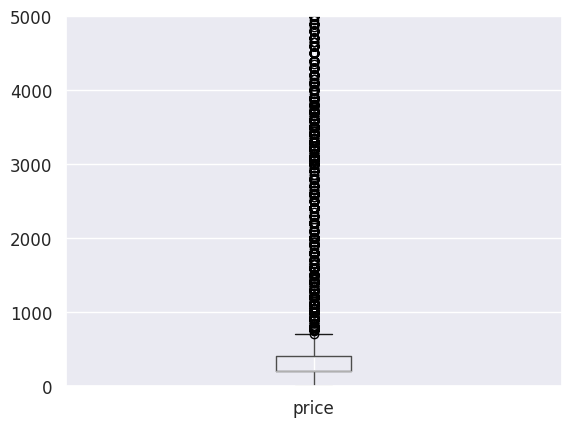

In [63]:
# посчитаем сколько пользователи потратили денег
user_costs = transactions.groupby('user_id').agg({'price':'sum'}).reset_index().sort_values(by = 'price', ascending = False)
ax = user_costs.boxplot()
ax.set_ylim(0, 5000)

In [64]:
fig = px.histogram(user_costs[(user_costs['price'] < user_costs['price'].quantile(0.95)) 
                 & (user_costs['price']!=0)],
                 x="price",
                 nbins=20,
                 width=800, height=400)
fig.show()

In [65]:
user_costs['price'].describe()

count    102989.000000
mean        576.512997
std        2344.543193
min           0.000000
25%         200.000000
50%         200.000000
75%         400.000000
max      507900.000000
Name: price, dtype: float64

В среднем пользователь тратит 576 рублей. Больше всего пользователей, которые потратили 200-390р суммарно. Есть выбросы - пользователи которые потратили более 500000р.

# Категоризация станций

In [66]:
fig = px.scatter(revenue, x = 'numberSlots', y = 'station_revenue', color = 'is_paybacked',
                 width=800, height=400)
fig.show()

Среди окупившихся станций преобладают 4х и 8ми баночные станции

In [67]:
fig = px.scatter(revenue, x = 'life_time', y = 'station_revenue',color = 'is_paybacked',
                 width=800, height=400)
fig.show()

На всех лайфтаймах есть неокупаемы станции



In [68]:
fig = px.scatter(revenue[revenue['station_revenue'] < revenue['station_revenue'].quantile(0.95)],
                 x = 'city',
                 y = 'is_paybacked',
                 color = 'station_revenue',
                 width=1000, height=600,
                 opacity = 0.9)
fig.show()

Почти в половине городов станции вообще не окупаются.

In [69]:
revenue.corr()[['station_revenue']].sort_values(by = 'station_revenue', ascending = False)

<ipython-input-69-0bee21da773f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,station_revenue
station_revenue,1.000000
station_revenue_per_day,0.891021
is_paybacked,0.502908
numberSlots,0.464130
life_time,0.337478
additionalImagesCount,0.146084
csq,0.059033
voiceLevel,-0.018585
groupTariffs.periodCount,-0.102454
longitude,-0.122918


In [70]:
# построим карту с нашими станциями
fig = px.scatter_geo(revenue,
                    lat='latitude',
                    lon='longitude',
                    size = 'station_revenue',
                    hover_name = 'city',
                     color = 'is_paybacked',
                     width = 800,
                     height = 800)

fig.show()

Окупаемые станции расположены в основном рядом с Москвой (+ Московская область), в Пензе, на юге России (в курортных городах), также в Екатеринбурге. В Сибири и на дальнем востоке станции почти не окупились.

# Общие выводы

В нашем распоряжении оказались данные о компании продающей станции для портативных зарядных устройств, предоставляемых в аренду пользователям. Станции устанавливаются в кафе, ресторанах, торговых центрах, кинотеатрах и аэропортах. В основном устанавливаются станции на 4,8,24 пауэрбанка. Мы проанализировали, какие станции окупились, какие приносят больше прибыли, посчитали лайфтайм станций и среднемесячную прибыль. Так же мы пронализировали пользователей сервиса. 


*    Не приносят денег 9 станций (прибыль равна 0)
*    В основом компания продаёт станции на 8 и 4 банки.
*    Не окупаются 81% 
*    У нас больше всего станций которые живут 9-10 месяцев или только 2-3.
*    40 станций не прожили и месяца
*    Несмотря на высокую среднемесячную прибыль, станции на 24 банки (например в аэропорту) пока не окупились.
*    Быстрее всех окупаются станции на 4 и 8 банок, установленные в крупных ТЦ, кинотеатрах, ресторанах в курортных зонах.
*    Больше всего станций установлено в Самаре, Сочи, Нижним Новгороде.
*    Самые прибыльные города это :Сочи, Москва, Владикавказ, Нальчик, Кисловодск, Самара, Мурманск, Ставрополь, Екатеринбург, Тольятти
*    Топ городов по месячной прибыли:Москва, Сочи, Владикавказ, Иркутск, Мурманск, Самара, Кисловодск, Ялта, Тольятти,Ставрополь
*    В среднем пользователь тратит 576 рублей. Больше всего пользователей, которые потратили 200-390р суммарно. Есть выбросы - пользователи которые потратили более 500000р.
*    Среди окупившихся станций преобладают 4х и 8ми баночные станции
*    На всех лайфтаймах есть неокупаемы станции
*    Почти в половине городов станции вообще не окупаются.
*    Окупаемые станции расположены в основном рядом с Москвой (+ Московская область), в Пензе, на юге России (в курортных городах), также в Екатеринбурге. В Сибири и на дальнем востоке станции почти не окупились.



Мы бы предложили разделать станции на следующие сегменты:


1.   Станции расположенные в Сибири и на Дальнем Востоке - эти станции практически не окупаются
2.   Станции расположенные в проходных местах Москвы, Московской области и курортных городах РФ - это крупные рестораны, от 100 посадочных мест, аэропорты, торговые центры. Там возможна установка крупных станций на 24 банки
3. Станции расположенные в тех же городах, но в более мелких заведениях.

